C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 0.9134
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 1.0000 - loss: 0.0000e+00


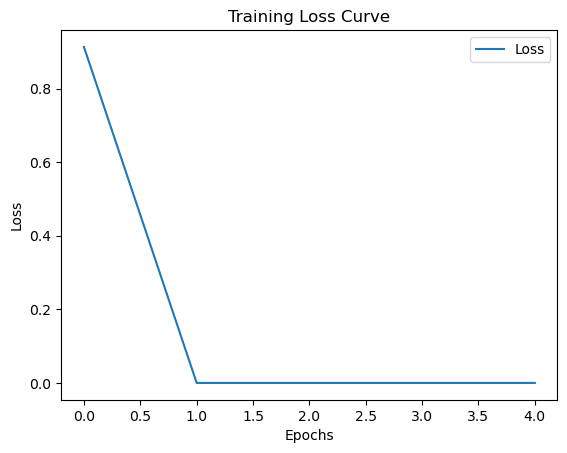

Initial Training Accuracy: 1.0000


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers, models

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (64, 64)) 
    image = image.astype(np.float32) / 255.0 
    return image

image_path = "C:\\Users\\Dharani Ravi\\Pictures\\WhatsApp Image 2024-12-12 at 14.17.20_34c7e76a.jpg"  
image = load_image(image_path)

image_tensor = image.reshape(1, 64, 64, 1)

model = models.Sequential([
    layers.Conv2D(3, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(2883, activation='relu'), 
    layers.Dense(2, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

labels = np.array([[1, 0]])  

history = model.fit(image_tensor, labels, epochs=5, verbose=1)

plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

accuracy = history.history['accuracy'][-1]
print(f"Initial Training Accuracy: {accuracy:.4f}")
